C:\Users\Stefan\AppData\Local\Temp\ipykernel_14716\2524959418.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  clean_data = data.fillna(method='ffill')


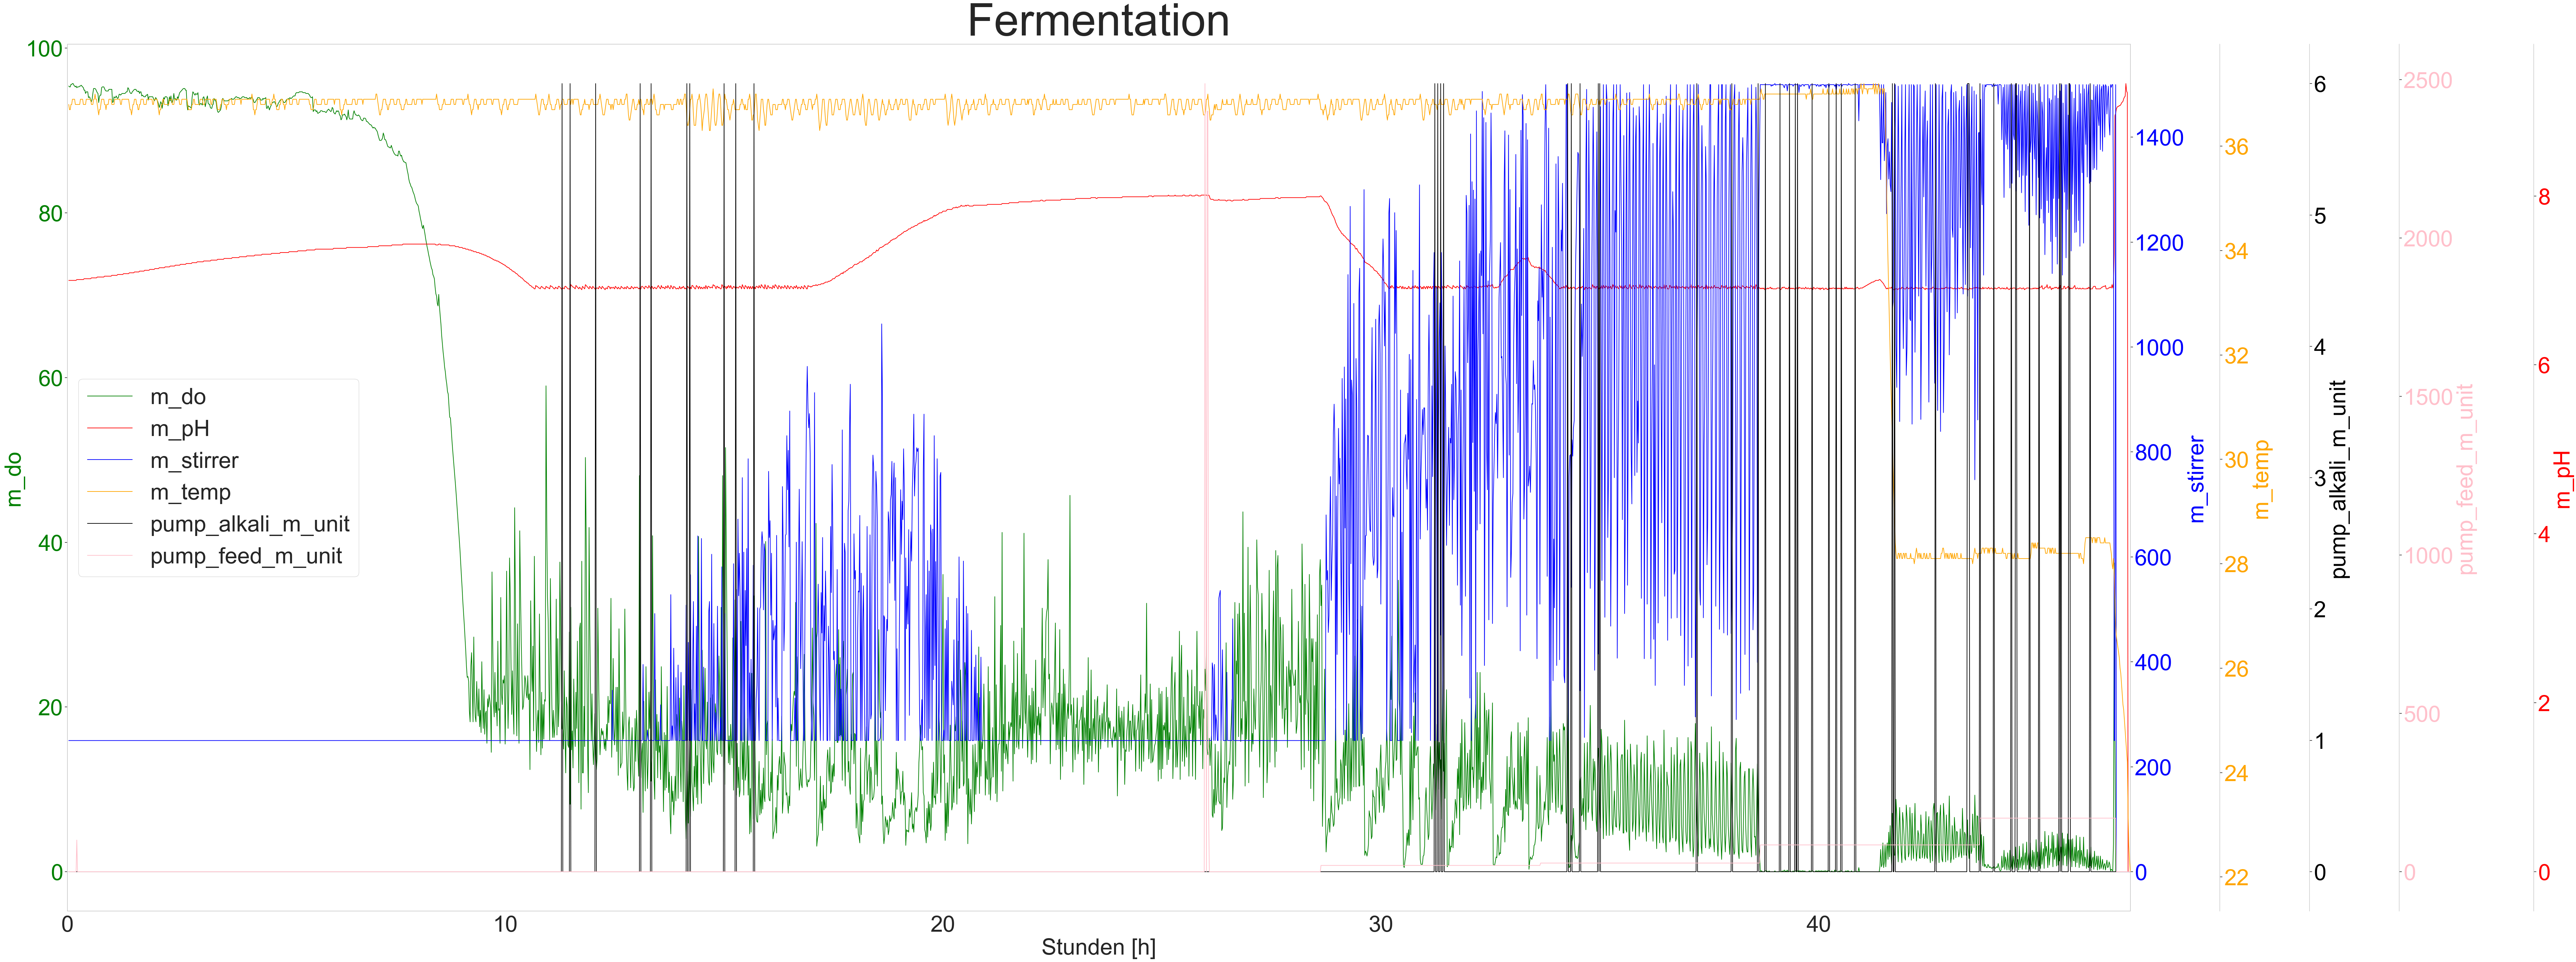

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Pfad zur Excel-Datei (Musst du noch anpassen)
excel_file = "C:/Users/Stefan/Downloads/ROT-ferm.xlsx"

# Daten laden
data = pd.read_excel(excel_file, skiprows=1)

# Spaltennamen setzen
data.columns = ["Stunden", "m_do", "m_pH", "m_stirrer", "m_temp", "pump_alkali_m_unit", "pump_feed_m_unit"]

max_stunden = data["Stunden"].max()

# NA-Werte durch den vorherigen Wert in der gleichen Spalte ersetzen
clean_data = data.fillna(method='ffill')

# Farben für die verschiedenen Variablen
colors = ["green", "red", "blue", "orange", "black", "pink"]

# Erstellen des Basisplots mit angepasster Größe
fig, ax1 = plt.subplots(figsize=(80, 30))  # Hier kannst du die Größe anpassen

# Primäre y-Achse
ax1.plot(clean_data["Stunden"], clean_data["m_do"], label="m_do", color=colors[0])
ax1.set_ylabel("m_do", color=colors[0], fontsize = 50)
ax1.tick_params(axis='y', labelcolor=colors[0], labelsize = 50)
ax1.grid(False)  # Raster entfernen

# Sekundäre y-Achse
ax2 = ax1.twinx()
ax2.plot(clean_data["Stunden"], clean_data["m_pH"], label="m_pH", color=colors[1])
ax2.set_ylabel("m_pH", color=colors[1], fontsize = 50)
ax2.tick_params(axis='y', labelcolor=colors[1],  labelsize = 50)
ax2.spines['right'].set_position(('outward', 900))
ax2.grid(False)  # Raster entfernen

# Zusätzliche y-Achsen erstellen
axes = [ax1, ax2]
for i, column in enumerate(["m_stirrer", "m_temp", "pump_alkali_m_unit", "pump_feed_m_unit"], start=2):
    # Neue Achse erstellen
    ax_new = ax1.twinx()
    ax_new.spines["right"].set_position(("outward", 200 * (i - 2)))  # Position der neuen Achse anpassen
    ax_new.plot(clean_data["Stunden"], clean_data[column], label=column, color=colors[i])
    ax_new.set_ylabel(column, color=colors[i], fontsize = 50) # Hier kannst du die Größe anpassen
    ax_new.tick_params(axis='y', labelcolor=colors[i], labelsize = 50) # Hier kannst du die Größe anpassen
    ax_new.grid(False)  # Raster entfernen
    axes.append(ax_new)

# x-Achse setzen
ax1.set_xlabel('Stunden [h]', fontsize = 50)
ax1.set_xlim([0, data["Stunden"].max()])
ax1.tick_params(axis='x', labelsize=50)

# Titel setzen
plt.title('Fermentation',  fontsize = 100)

# Layout anpassen, um Überlappungen zu vermeiden
fig.tight_layout()

# Legenden anpassen
lines, labels = [], []
for ax in axes:
    ax_line, ax_label = ax.get_legend_handles_labels()
    lines.extend(ax_line)
    labels.extend(ax_label)

ax1.legend(lines, labels, loc='center left', fontsize = 50)

# Grafik speichern mit hoher Auflösung
plt.savefig('high_res_plot.png', dpi=300, bbox_inches='tight')  # Hohe DPI und Layout anpassen

# Grafik anzeigen
plt.show()
